# DSCI 235 SP 2024 Assignment 4
<font color = emerald>Jessica Reyes<font>

In [13]:
import numpy as np
import pandas as pd

## Part 1:  Analyzing iris plant data


In this part of the assignment we will analyze the **iris dataset**.
This is a famous dataset collected by statistician and biologist Ronald Fisher in 1936. 
This dataset even has its own [wikipedia page](https://en.wikipedia.org/wiki/Iris_flower_data_set).
The data contains measurments that describe three types of iris flowers
*Iris setosa*, *Iris virginica*, and *Iris versicolor*.

<img style="padding: 10px;" align="right" alt="Iris setosa in public domain" src="https://upload.wikimedia.org/wikipedia/commons/8/86/Iris_setosa.JPG" width="200">

<img style="padding: 10px;" align="right" alt="Iris versicolor Danielle Langlois CC BY-SA 3.0" src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg" width="200">

<img style="padding: 10px" align="right" alt="Iris virginica by Frank Mayfield CC BY-SA 2.0" src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg" width="200">


The dataset contains contains measurments of four characteristics:  sepal length, sepal width, petal length, petal width.  
Altogether there are measurments for 150 iris plants, 50 from each species.  Each plant corresponds to a row in the matrix.
The data is thus a matrix of size $150 \times 5$, where the first four columns contain the measurments, and the last column indicates which iris species a sample belongs to.

In [14]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# since the data mixes strings and numbers we first read it as an
# array of strings
iris = np.genfromtxt(url, delimiter=',', dtype=str)
columns = ('sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species')
# next, extract the measurments as an array of floating point numbers
data = iris[:, 0:4].astype('float')
# the spcies information is contained in the last column:
species = iris[:, 4]

In [15]:
# verify that the labels correspond to the three species names:
np.unique(species)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

Using this data compute the following:

* Write code that verifies that each species has 50 samples associated with it.

In [16]:
each_species, counts = np.unique(species, return_counts=True)
print(each_species)
print(counts)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[50 50 50]


* How many iris plants have sepal length that is greater than 6cm?

In [17]:
sepal_length = data[:,0]
greater_than_6 = sepal_length > 6
print("Sepal length greater than 6cm:", np.sum(greater_than_6))

Sepal length greater than 6cm: 61


* We would like to see if there are any differences between the three iris species.  Compare the average of each of the four characteristics of iris plants collected in the data (sepal length, sepal width, petal length, petal width) for the three iris species.  Use `np.mean` to compute the average.  Based on the averages you computed, which characteristics best distinguish between the species?

In [18]:
df = pd.DataFrame(data, columns=["sepallength", "sepalwidth", "petallength", "petalwidth"])

df["species"] = species

means = df.groupby("species").mean()

print(means)

                 sepallength  sepalwidth  petallength  petalwidth
species                                                          
Iris-setosa            5.006       3.418        1.464       0.244
Iris-versicolor        5.936       2.770        4.260       1.326
Iris-virginica         6.588       2.974        5.552       2.026


* To provide further evidence for your observation from above, plot a histogram of sepal length, separately for each iris species.  The code below illustrates how to do so on artificially generated data.  How does the histogram allow you to address the question about usefulness of the different iris characteristics for distinguishing between iris species?  What does it specifically tell you about the relevance of sepal length?

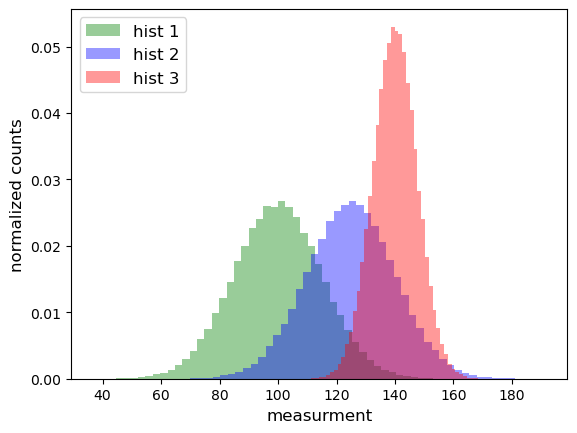

In [19]:
import matplotlib.pylab as plt

mu = 100
sigma = 15
x1 = mu + sigma * np.random.randn(100000)
x2 = mu + 25 + sigma * np.random.randn(100000)
x3 = mu + 40 + sigma/2 * np.random.randn(100000)
num_bins = 50
plt.hist(x1, num_bins, facecolor='green', alpha=0.4, 
         density=True, label='hist 1');
plt.hist(x2, num_bins, facecolor='blue', alpha=0.4, 
         density=True, label='hist 2');
plt.hist(x3, num_bins, facecolor='red', alpha=0.4, 
         density=True, label='hist 3');
plt.xlabel('measurment',fontsize=12);
plt.ylabel('normalized counts', fontsize=12);

plt.legend(loc='upper left', fontsize='12');

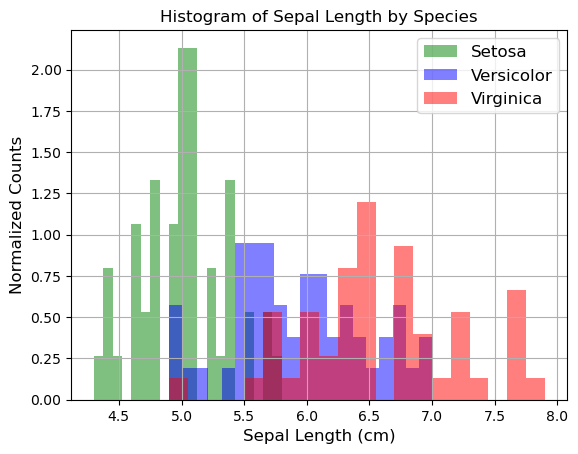

In [20]:
# your code here
# your code here
setosa_sepal = data[species=="Iris-setosa", 0]
versicolor_sepal = data[species=="Iris-versicolor", 0]
virginica_sepal = data[species=="Iris-virginica", 0]

# Histogram settings
num_bins = 20

# Plot the histograms
plt.hist(setosa_sepal, bins=num_bins, alpha=0.5, label='Setosa', color='green', density=True)
plt.hist(versicolor_sepal, bins=num_bins, alpha=0.5, label='Versicolor', color='blue', density=True)
plt.hist(virginica_sepal, bins=num_bins, alpha=0.5, label='Virginica', color='red', density=True)

# Labels and legend
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Normalized Counts', fontsize=12)
plt.title('Histogram of Sepal Length by Species')
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)
plt.show()

The histograms overlap quite a bit, especially between Versicolor & Virginica. Setosa has short sepals, but it overlaps slightly with Versicolor. The histogram shows that sepal length is not a strong distinguishing characteristic between the species. While Setosa tends to have smaller sepal lengths, the overlap between Versicolor & Virginica means we can't easily use sepal length to classify all three species.

## Part 2:  array intersection

Write a NumPy function that computes the intersection (i.e. the elements in common) of two NumPy one-dimensional arrays **without using for loops**.  You can assume that there are no repeated values in each of the two input arrays.  Include code that verifies that your code works correctly.  For code verification, you can use the Python `set` data structure and its intersection method.

For example, the result of applying `intersection` to the arrays `[1,2,5,6]` and `[2,3,5,7]` should be the array that contains `[2,5]`.

In [21]:
def intersection(a, b) :
    return np.intersect1d(a,b)


In [22]:
# code for testing your implementation of intersection
arr1 = np.array([1, 2, 5, 6])
arr2 = np.array([2, 3, 5, 7])

result = intersection(arr1, arr2)
print("Intersection using NumPy: ", result)

set_intersection = set(arr1).intersection(arr2)
print("Intersection using set: ", np.array(list(set_intersection)))

Intersection using NumPy:  [2 5]
Intersection using set:  [2 5]


*Caveat:*  You need to implement this from scratch without using any NumPy built-in functions like `intersect1d` `in1d` and `unique`.
For your solution use the following approach:

* Concatenate the two arrays using [np.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
* Sort the resulting array using [np.sort](https://numpy.org/doc/stable/reference/generated/numpy.sort.html).
* How does the sorted array look like?  How can you now recognize values that are present in both arrays?

## Part 3:  Feature selection for machine learning

### Preliminaries

In [data classification](https://en.wikipedia.org/wiki/Statistical_classification), which is a primary area of machine learning, the data scientist is given a matrix whose rows represent instances that need to classified into one of several classes, and a set of labels that tell which class each data point belongs to.  This is the same setup you had for the iris dataset from assignment 1.

Next, we introduce some notation: we work with a dataset of $N$ labeled examples.  Each labeled example is a pair
$(\mathbf{x}_i, y_i)$, where $\mathbf{x}_i$ is a $d$-dimensional vector (we use boldface to denote vectors), and $y_i$ is the label associated with $\mathbf{x}_i$.  In a binary classification problem we'll use the values $\pm 1$ or $\{0,1\}$ to denote the labels.
In the data we use below, we will use the values $\pm 1$; those vectors associated with the label $+1$ are called *positive examples*, and those associated with a label $-1$ are called *negative examples*.
The data points can be stacked together to form an $N \times d$ matrix $X$, where row $i$ is the data vector $\mathbf{x}_i$.
The columns of the data matrix $X$ are called *features*.
Let's demonstrate the idea with the iris dataset, focusing on the sepal width/length features and two of the three species:


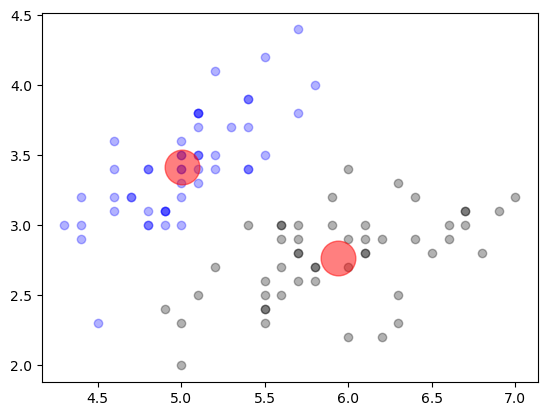

In [23]:
import numpy as np
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# since the data mixes strings and numbers we first read it as an
# array of strings
iris = np.genfromtxt(url, delimiter=',', dtype=str)
columns = ('sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species')
# next, extract the measurments as an array of floating point numbers
# and focus on the first two features:
X = iris[:100, :2].astype('float')
# the spcies information is contained in the last column:
y = iris[:100, 4]

# a scatter plot:
import matplotlib.pylab as plt
plt.plot(X[:50, 0], X[:50, 1], 'ob', alpha=0.3)
plt.plot(np.mean(X[:50, 0]), np.mean(X[:50, 1]), 'or', markersize=25, alpha=0.5)

plt.plot(X[50:, 0], X[50:, 1], 'ok', alpha=0.3)
plt.plot(np.mean(X[50:, 0]), np.mean(X[50:, 1]), 'or', markersize=25, alpha=0.5);

It's clear that for this pair of species, this pair of features would enable us to clearly distinguish between the two species.
To quantify the differences across species we consider the means of each class, plotted using the large red dots.
Here, we observe that that the two features are different in their means, which we will use below as a way to evaluate the usefulness of a feature.

While for the iris dataset all the features are useful, we may not be so lucky in general:
Your data might contain noisy features that are not useful for the task of discriminating between the two classes.
Therefore, it is often a good idea to remove such irrelevant/noisy features. 
One way to do so is to define a score that reflects the usefulness of a feature.
We will do so based on the difference between the means of a feature across classes.
The *Golub score* builds on that idea.  The Golub score $s_j$ for feature $j$ is defined as:

\begin{equation}
s_j = \frac{|\mu_j^+ - \mu_j^-|}{\sigma_j^+ + \sigma_j^-},
\end{equation}

where $\mu_j^+$ is the average of feature $j$ among the positive examples, and $\sigma_j^+$ is the standard deviation of the positive examples.  $\mu_j^-$ and $\sigma_j^-$ are defined analogously for the negative examples.  Finally, $|x|$ is the absolute value of $x$.
This score captures the intuition that a feature is useful if it has a different mean between the two classes.  Dividing by the standard deviation is a way of "normalizing" the scores to make them comparable for different features.
The method was described in the following publication:

* Golub, T.R., et al. Molecular classifiation of cancer: class discovery and class prediction by gene expression monitoring. Science 286 (1999) 531-537.

In this question you will look at gene expression data from the yeast *S. cerevisiea*.
Each row in the matrix has values that indicate how a particular gene in yeast behaves under different conditions.
More specifically, element $i,j$ indicates how much genetic material from gene $i$ is being produced at the RNA level in condition $j$.
Overall, there are 524 genes that were tested under 79 different conditions.
The labels indicate whether a given gene has a particular molecular function.
This dataset is one of the earliest datasets that were used in order to demonstrate that groups of genes can be characterized by this kind of data.  The original dataset was published in:

* Eisen, M., Spellman, P., Brown, P. and Botstein, D. (1998) Cluster analysis and display of genome-wide expression patterns. *Proc. Natl. Acad. Sci USA*, 95.

Your task is as follows:

* Using the code provided below read the dataset.  The labels are contained in the first column and the feature matrix is stored in the rest of the columns.  Separate the data into two variables:  a vector y which contains the labels, and a matrix X that contains the feature vectors.
* Implement the Golub scoring method using NumPy, *without using any for loops* in a method called golub, which takes as input a feature matrix X and vector of labels y and returns a vector containing the golub scores for the dataset.

To demonstrate the utility of the Golub score, we will add random features to the dataset and apply the Golub method to it.  We expect that the added noise features will be filtered out.  

* Add 100 noise features to the matrix X.  Use the NumPy [standard_normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.standard_normal.html) function to add noise features with a Gaussian distribution.
* Apply the Golub scoring method to the data, and choose the top 20 scoring features.  Determine how many of the noise features you were able to remove using this technique.

NumPy has methods for sorting arrays that would be useful for this assignment.  The [argsort](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html) function should be particularly useful.  You can also use [np.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html) to compute the standard deviation of the data.

Below are functions that you will need to write for this task:

In [24]:

def golub(X, y) :
    """Compute the golub score.
    
    Parameters:
        X: the feature data matrix
        y: the labels associated with X
        y is a vector whose length equals the number of rows of X.
    
    Returns:
        scores:  a vector whose length equals the number of columns of X, i.e.
        len(scores) == len(X[0])
    """
    classes = np.unique(y)
    scores = np.zeros(X.shape[1])
    for j in range(X.shape[1]):
        feature_j = X[:, j]
        mean_pos = np.mean(feature_j[y == classes[0]])
        mean_neg = np.mean(feature_j[y == classes[1]])
        std_pos = np.std(feature_j[y == classes[0]])
        std_neg = np.std(feature_j[y == classes[1]])
        score = abs((mean_pos - mean_neg)) / (std_pos + std_neg)
        scores[j] = score  
    return scores


def highest_scoring(scores, num_features):
    """Return indices of the highest scoring features according to 
    a given array of scores of their relevance.
    
    Parameters:
        scores: a 1d array that describes the utility of the 
        given features, computed e.g. using the golub score
        num_features: the number of top scoring features
    
    Returns:
        array containing the indices of the highest scoring 
        num_features as a 1d array
    """
    num_features = min(num_features, len(scores))   
    sorted_indices = np.argsort(scores)[::-1]
    return sorted_indices[:num_features]

def select_features(X, features) :
    """Select the given set of features from the provided data matrix.
    
    Parameters:
        X: the feature matrix
        features: the indices of the features that are to be kept 
        these are columns of the feature matrix.
    
    Returns:
        X_new: the data matrix that includes only the selected features.
    """
    X_new = X[:, features]
    return X_new


When using the code on a feature matrix $X$ and label of vectors $y$ we might proceed as follows:

```Python
scores = golub(X, y)
highest_scoring_features = highest_scoring(scores, 20)
X_new = select_features(X, highest_scoring_features)
```

First we will read in the data as a NumPy array.
The following commands will read the data directly from the web into a NumPy array.  Use that array for the rest of the analysis.
Recall that the labels are in the first column.

In [25]:
import numpy as np
url = 'http://www.cs.colostate.edu/~asa/courses/dsci235/spr21/data/yeast2.txt'
data = np.genfromtxt(url, delimiter=',')

In [26]:
data.shape

(524, 80)

In [27]:
# first step: separate the data matrix into the feature matrix and labels 
# vector; the labels are in the first column of the data matrix that you
# just read
X = data[:, 1:]
y = data[:, 0]

In [28]:
# add 100 noise features to the data matrix, i.e. add 100 columns
noise_features = np.random.standard_normal(size=(X.shape[0], 100))
X = np.hstack((X, noise_features))
print(X.shape)

(524, 179)


In [29]:
# determine the top 20 features according to the golub score
golub_scores = golub(X, y)
top_features = highest_scoring(golub_scores, 20)
print(top_features)

[60 56 61 78 55 77 57 48 71 49 22 50 67 23 59 62 21 63 64 24]


In [30]:
# write code that checks if feature selection was successful:
scores = golub(X, y)
top_features = highest_scoring(scores, 20)
X_new = select_features(X, top_features)
# determine how many of the noise features were removed
num_noise_features = X.shape[1] - X_new.shape[1]
print("Number of noise features removed:", num_noise_features)
print("New feature matrix with top 20 features: \n", X_new)
print("Golub scores: \n", scores)

Number of noise features removed: 159
New feature matrix with top 20 features: 
 [[-0.03686995  0.20647173 -0.05653393 ... -0.03441196 -0.01720598
   0.01966397]
 [-0.01754756  0.05966171 -0.0561522  ... -0.16143757 -0.00175476
   0.05264269]
 [-0.05956758  0.18090894  0.16546549 ...  0.09707309 -0.07501102
  -0.03088689]
 ...
 [ 0.03219886 -0.27710535 -0.01658729 ... -0.04195609  0.06732489
   0.02341735]
 [-0.02361399 -0.15217907  0.01049511 ...  0.00262378 -0.10495108
  -0.02623777]
 [ 0.10337398 -0.29663839 -0.06067603 ... -0.05168699  0.06292329
   0.0741596 ]]
Golub scores: 
 [3.37724118e-01 7.77739518e-02 5.59437817e-02 3.06371827e-02
 6.30126206e-02 5.41140464e-02 5.87526844e-02 1.29166764e-01
 2.12680013e-01 2.83222220e-01 1.86519186e-01 1.01036929e-01
 3.05245020e-01 4.05229221e-01 5.24454322e-01 2.31656813e-01
 5.24808146e-01 3.01113272e-01 3.83207416e-01 2.09188999e-01
 4.63888775e-01 6.57499267e-01 8.99341216e-01 7.59420385e-01
 5.98614423e-01 4.59206550e-01 3.38072779e-01

### Submission

Submit your assignment as a Jupyter notebook via Canvas.  

### Grading 

Here is a draft of the grading sheet for this assignment. 

```
Grading sheet for assignment 4

Part 1:  The iris data (35 pts)
  Data verification (5 pts)
  Sepal length (10 pts)
  Species differences (10 pts)
  Histograms (10 pts)
  
Part 2:  array intersection (15 pts)

Part 3:  feature selection (50 pts) 
  Golub score correctly computed  20 pts
  highest_scoring correctly implemented  10 pts
  select_features correctly implemented  10 pts
  random features added correctly 5 pts
  Computing Golub score on the given data and demonstrating its
  effectiveness  5 pts
```

Throughout the course, use of for loops is discouraged.  **Points will be taken off for using for loops to iterate over an array.**  NumPy provides tools for accomplishing things without the need for Python loops.
